Tensorflow 初探

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
print(tf.__version__)

1.13.1


In [0]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
def NN(m1,m2,w1,w2,b):
  z = m1 * w1 + m2 * w2 + b
  return sigmoid(z)

def sigmoid(x):
  return 1/(1+np.exp(-x))

In [0]:
w1=np.random.randn()
w2=np.random.randn()
b=np.random.randn()
phrases = ["看起來像","我猜是","我想是","可能是","看起來像是"]
data = [[3,1.5,1],[2,1,0],[4,1.5,1],[3.5,5,0],[2.0,5,1]]
rand_data = data[np.random.randint(len(data))]
m1 = rand_data[0]
m2 = rand_data[1]
prediction = NN(m1,m2,w1,w2,b)
prediction_text = ['藍色','紅色'][int(np.round(prediction))]
phrase = np.random.choice(phrases) + "" + prediction_text
o = '這個' + phrase + '真的是' + ['藍色','紅色'][rand_data[2]]
o

'這個看起來像藍色真的是紅色'

In [0]:
#Example NN
n_features = 3
n_dense_neurons = 3
tf.set_random_seed(101)

x = tf.placeholder(tf.float32, (None, n_features))
b = tf.Variable(tf.zeros([n_dense_neurons]))
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
xW = tf.matmul(x,W)
z = tf.add(xW, b)
a = tf.sigmoid(z)
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  layer_out = sess.run(a,feed_dict = {x : np.random.random([5,n_features])})
print(layer_out)

Instructions for updating:
Colocations handled automatically by placer.
[[0.37180263 0.4848752  0.40013963]
 [0.37374812 0.5469098  0.48332396]
 [0.29870242 0.51684254 0.45256433]
 [0.3235687  0.45716134 0.43859345]
 [0.43333548 0.42000324 0.42359108]]


In [0]:
X = tf.constant([[1,0,1,0],[1,0,1,1],[0,1,0,1]], dtype=tf.float32)
y = tf.constant([[1],[1],[0]],dtype=tf.float32)
def sigmoid(x):
  return 1/(1+tf.exp(-x))
def derivatives_sigmoid(x):
    return x * (1 - x)

In [0]:
epoch = 1000
lr = 0.1
inputlayer_neurons = X.shape[1]
hiddenlayer_neurons = 10
output_neurons = 1

In [0]:
wh = tf.random_normal(shape=[int(inputlayer_neurons),int(hiddenlayer_neurons)],
                      mean=0.0,stddev=1.0,
                      dtype=tf.float32,seed=None,name=None)
bh =  tf.random_normal(shape=[1,int(hiddenlayer_neurons)],
                      mean=0.0,stddev=1.0,
                      dtype=tf.float32,seed=None,name=None)
wout =  tf.random_normal(shape=[int(hiddenlayer_neurons),int(output_neurons)],
                      mean=0.0,stddev=1.0,
                      dtype=tf.float32,seed=None,name=None)
bout =  tf.random_normal(shape=[1,int(output_neurons)],
                      mean=0.0,stddev=1.0,
                      dtype=tf.float32,seed=None,name=None)

In [0]:
for i in range(epoch):
  hidden_layer_input1 = tf.matmul(X, wh)
  hidden_layer_input = hidden_layer_input1 + bh
  hidden_layer_activations = sigmoid(hidden_layer_input)
  output_layer_input1 = tf.matmul(hidden_layer_activations, wout)
  output_layer_input = output_layer_input1 + bout
  output = sigmoid(output_layer_input)
  
  E= y-output
  back_output_layer = derivatives_sigmoid(output)
  back_hidden_layer = derivatives_sigmoid(hidden_layer_activations)
  d_output = E * back_output_layer
  Error_at_hidden_layer = tf.matmul(d_output, tf.transpose(wout))
  d_hiddenlayer = Error_at_hidden_layer * back_hidden_layer
  wout += tf.matmul(tf.transpose(hidden_layer_activations), d_output) * lr 
  bout += tf.reduce_sum(d_output) * lr
  wh += tf.matmul(tf.transpose(X), d_hiddenlayer) * lr
  bh += tf.reduce_sum(d_output)*lr
  
sess = tf.Session()
print('Actual :\n', sess.run(y), '\n')
print('Predicted :\n', sess.run(output), '\n')
  
  

Actual :
 [[1.]
 [1.]
 [0.]] 

Predicted :
 [[0.9697147 ]
 [0.92694074]
 [0.09504487]] 



In [0]:
!pip install tensorflow==2.0.0-rc0 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

     |████████████████████████████████| 86.3MB 444kB/s 
     |████████████████████████████████| 71kB 34.3MB/s 
     |████████████████████████████████| 4.3MB 42.7MB/s 
     |████████████████████████████████| 501kB 61.6MB/s 
  Created wheel for opt-einsum: filename=opt_einsum-3.0.1-cp36-none-any.whl size=58500 sha256=a4298c376426791461db08199b086d69e68d6c5e0692ddfa75c7236a2e46a630
  Stored in directory: /root/.cache/pip/wheels/91/98/8d/10e3d4e04c959597a411b91acd3695e9e2d210e68ce3427aad
Successfully built opt-einsum
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
tf.__version__

'2.0.0-rc0'

In [0]:
data = load_iris()
x_train, x_test, y_train, y_test= train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#model.fit(x_train, y_train, epochs=50)
history = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Train on 73 samples, validate on 32 samples
Epoch 1/100
73/73 [==============================] - 0s 6ms/sample - loss: 2.2660 - accuracy: 0.0822 - val_loss: 1.8022 - val_accuracy: 0.4062
Epoch 2/100
73/73 [==============================] - 0s 225us/sample - loss: 1.7780 - accuracy: 0.2877 - val_loss: 1.4004 - val_accuracy: 0.4062
Epoch 3/100
73/73 [==============================] - 0s 225us/sample - loss: 1.3859 - accuracy: 0.4110 - val_loss: 1.1598 - val_accuracy: 0.7188
Epoch 4/100
73/73 [==============================] - 0s 209us/sample - loss: 1.1839 - accuracy: 0.4795 - val_loss: 1.0322 - val_accuracy: 0.5625
Epoch 5/100
73/73 [==============================] - 0s 219us/sample - loss: 1.0806 - accuracy: 0.5205 - val_loss: 0.9502 - val_accuracy: 0.5938
Epoch 6/100
73/73 [==============================] - 0s 206us/sample - loss: 0.9579 - accuracy: 0.6438 - val_loss: 0.8868 - val_accuracy: 0.5938
Epoch 7/100
73/73 [==============================] - 0s 218us/sample - loss: 0.9012 - ac

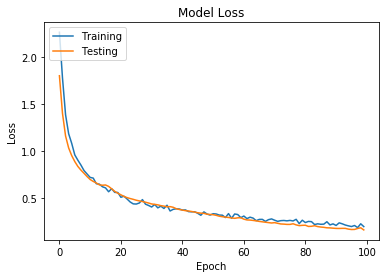

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Testing'], loc='upper left')
plt.show()

In [0]:
model.evaluate(x_test, y_test)

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.13053987473249434, 1.0]

In [0]:
y_pred = model.predict_classes(x_test[0:3])

In [0]:
print(y_pred)

[1 0 2]


In [0]:
x_test[0:3],y_test[0:3]

(array([[6.1, 2.8, 4.7, 1.2],
        [5.7, 3.8, 1.7, 0.3],
        [7.7, 2.6, 6.9, 2.3]]), array([1, 0, 2]))

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [0]:
df=pd.DataFrame(data.data)

In [0]:
data_df = df[[0,1,2]]
target_df = df[3]
X_train, X_test, y_train, y_test = train_test_split(data_df, target_df)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1000, input_dim=3, kernel_initializer='normal', activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])
adam = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='mse', optimizer=adam, metrics=['mse','mae'])
history = model.fit(X_train, y_train, epochs=300, validation_split=0.4)

W0824 09:07:49.040391 140072041154432 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 67 samples, validate on 45 samples
Epoch 1/300
67/67 [==============================] - 0s 2ms/sample - loss: 1.6802 - mse: 1.6802 - mae: 1.0194 - val_loss: 0.9573 - val_mse: 0.9573 - val_mae: 0.7996
Epoch 2/300
67/67 [==============================] - 0s 226us/sample - loss: 1.0520 - mse: 1.0520 - mae: 0.8058 - val_loss: 0.5689 - val_mse: 0.5689 - val_mae: 0.6387
Epoch 3/300
67/67 [==============================] - 0s 212us/sample - loss: 0.6560 - mse: 0.6560 - mae: 0.6859 - val_loss: 0.3504 - val_mse: 0.3504 - val_mae: 0.5218
Epoch 4/300
67/67 [==============================] - 0s 207us/sample - loss: 0.4333 - mse: 0.4333 - mae: 0.5917 - val_loss: 0.2335 - val_mse: 0.2335 - val_mae: 0.4223
Epoch 5/300
67/67 [==============================] - 0s 206us/sample - loss: 0.3232 - mse: 0.3232 - mae: 0.5122 - val_loss: 0.1839 - val_mse: 0.1839 - val_mae: 0.3506
Epoch 6/300
67/67 [==============================] - 0s 215us/sample - loss: 0.2595 - mse: 0.2595 - mae: 0.4444 - val_loss:

In [0]:
model.evaluate(X_test, y_test)

W0824 09:07:58.203101 140072041154432 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


38/38 [==============================] - 0s 632us/sample - loss: 0.0547 - mse: 0.0547 - mae: 0.1658


[0.05473129686556364, 0.054731295, 0.16584389]

In [0]:
y_pred = model.predict_classes(X_test[0:3])
y_pred

W0824 09:07:58.467851 140072041154432 training.py:510] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


array([[1],
       [1],
       [1]], dtype=int32)

In [0]:
y_pred,y_test[0:3]

(array([[1],
        [1],
        [1]], dtype=int32), 71     1.3
 104    2.2
 128    2.1
 Name: 3, dtype: float64)

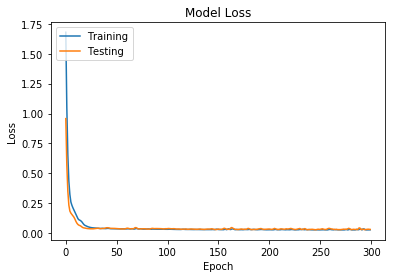

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Testing'], loc='upper left')
plt.show()

# Logistic regression with TF.Keras

In [0]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
data = load_iris()
x_train, x_test, y_train, y_test= train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(500, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=800)

Train on 105 samples
Epoch 1/800
105/105 [==============================] - 0s 2ms/sample - loss: 4.0168 - accuracy: 0.3524
Epoch 2/800
105/105 [==============================] - 0s 87us/sample - loss: 2.6058 - accuracy: 0.3524
Epoch 3/800
105/105 [==============================] - 0s 67us/sample - loss: 1.5835 - accuracy: 0.3524
Epoch 4/800
105/105 [==============================] - 0s 94us/sample - loss: 1.1925 - accuracy: 0.5810
Epoch 5/800
105/105 [==============================] - 0s 77us/sample - loss: 1.0130 - accuracy: 0.5143
Epoch 6/800
105/105 [==============================] - 0s 78us/sample - loss: 0.8966 - accuracy: 0.5714
Epoch 7/800
105/105 [==============================] - 0s 76us/sample - loss: 0.8071 - accuracy: 0.5429
Epoch 8/800
105/105 [==============================] - 0s 79us/sample - loss: 0.7582 - accuracy: 0.4667
Epoch 9/800
105/105 [==============================] - 0s 85us/sample - loss: 0.7200 - accuracy: 0.6667
Epoch 10/800
105/105 [======================

In [0]:
model.evaluate(x_test, y_test)

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.1750778113802274, 1.0]

# Pansas dummy variable

In [0]:
import pandas as pd
import sklearn
import numpy as np

In [0]:
d = {'col1': [1, 2], 'col2': [3, 4],  'col3': ["Jerry", "Bill"]}
df = pd.DataFrame(data=d)
df

,col1,col2,col3
0,1,3,Jerry
1,2,4,Bill


In [0]:
#get_dummies
#適合有順序尺度
dummies=pd.get_dummies(df["col3"])
dummies

,Bill,Jerry
0,0,1
1,1,0


In [0]:
pd.concat([df,dummies],axis='columns')

,col1,col2,col3,Bill,Jerry
0,1,3,Jerry,0,1
1,2,4,Bill,1,0


In [0]:
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()

In [0]:
Label.fit_transform(df.col3)

array([1, 0])

In [0]:
#OneHotEncoder (針對數字)
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(categorical_features=[0])
X = df[["col1","col2"]].values
onehot.fit_transform(X).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1., 0., 3.],
       [0., 1., 4.]])

In [0]:
#LabelEncoder()-> OneHotEncoder() 
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
X = df[["col3"]].values
df_cat_1hot = encoder.fit_transform(X)
df_cat_1hot

array([[1],
       [0]])

# One-Hot

In [0]:
#適合名目尺度
#    cat mat on sat the
#the 0   0   0  0   1
#cat 1   0   0  0   0
#sat 0   0   0  1   0

In [0]:
indices = [0, 1, 2]
depth = 5
tf.one_hot(indices, depth)  # output: [3 x 3]
# [[1., 0., 0.],
#  [0., 1., 0.],
#  [0., 0., 1.]]

<tf.Tensor 'one_hot_1:0' shape=(3, 5) dtype=float32>

In [0]:
indices = [0, 2, -1, 1]
depth = 4
tf.one_hot(indices, depth,
           on_value=5.0, off_value=0.0,
           axis=-1)  # output: [4 x 3]
# [[5.0, 0.0, 0.0],  # one_hot(0)
#  [0.0, 0.0, 5.0],  # one_hot(2)
#  [0.0, 0.0, 0.0],  # one_hot(-1)
#  [0.0, 5.0, 0.0]]  # one_hot(1)

<tf.Tensor: id=50145, shape=(4, 4), dtype=float32, numpy=
array([[5., 0., 0., 0.],
       [0., 0., 5., 0.],
       [0., 0., 0., 0.],
       [0., 5., 0., 0.]], dtype=float32)>

In [0]:
indices = [[0, 2], [1, -1]]
depth = 3
tf.one_hot(indices, depth,
           on_value=1.0, off_value=0.0,
           axis=-1)  # output: [2 x 2 x 3]
# [[[1.0, 0.0, 0.0],   # one_hot(0)
#   [0.0, 0.0, 1.0]],  # one_hot(2)
#  [[0.0, 1.0, 0.0],   # one_hot(1)
#   [0.0, 0.0, 0.0]]]  # one_hot(-1)

<tf.Tensor: id=50069, shape=(2, 2, 3), dtype=float32, numpy=
array([[[1., 0., 0.],
        [0., 0., 1.]],

       [[0., 1., 0.],
        [0., 0., 0.]]], dtype=float32)>

# Numeric column

In [0]:
numeric_feature_column = tf.feature_column.numeric_column(key="SepalLength")

In [0]:
numeric_feature_column = tf.feature_column.numeric_column(key="SepalLength",
                                                          dtype=tf.float64)

In [0]:
vector_feature_column = tf.feature_column.numeric_column(key="Jerry",
                                                         shape=10)

In [0]:
print(vector_feature_column)

NumericColumn(key='Jerry', shape=(10,), default_value=None, dtype=tf.float32, normalizer_fn=None)


In [0]:
matrix_feature_column = tf.feature_column.numeric_column(key="MyMatrix",
                                                         shape=[10,5])

In [0]:
vector_feature_column2 = tf.feature_column.numeric_column(key="Terry",
                                                         shape=10)

In [0]:
##https://www.tensorflow.org/guide/feature_columns